In [1]:
# data analysis
#18/05/21: stripped down version of IBM code for running locally on IBM Qsystem 1
import math
import certifi
# Importing standard Qiskit libraries and configuring account
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy import stats

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer,BasicAer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity


In [2]:
#create folder name for saving in
from datetime import date
import os
import shutil
#date is used for file names later
today = date.today()
today=str(today)
#today=str('simulation')
#name of the quantum computer being used is the foldername and also used in the functions to select the computer
cname='ibmq_ehningen'
ii=complex(0,1)

0.028996365446871102
-0.022921606289286283


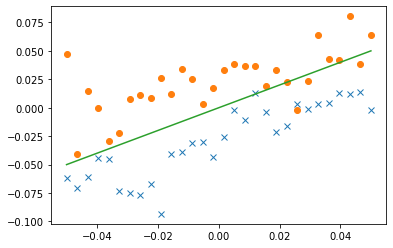

In [3]:
Fx = np.load(str(cname+str("_LR_2022_2Q_Yweight")+str("/")+str("_2Q_est")+str('_EM_only')+str("/")+str("all_data")+str(".npz")),allow_pickle=True)
#print(Fx)
data_load=Fx['arr_0']
Fs = np.load(str(cname+str("_LR_2022_2Q_Yweight")+str("/")+str("tot_shots")+str(".npz")),allow_pickle=True)
tot_shots=Fs['arr_0']
#print(data_load)
#print(len(data_load))
#in the real thing this is 20,000

shotsEM=20000
shots_actual=5000

shotsper=np.round(512)
p=0.5
chiX1 = 2.858721391887164;
chiX2 = -2.858718950651175;
chiX3 =  0;
chiX4 = 0;

chiY1 = -1.254216852498116;
chiY2 = -1.254220587644561;
chiY3 = 0;
chiY4 =  2.606344145490742;



#first load the error mitigation
thvec=np.linspace(-0.05,0.05,30)



estxvec=[]
estyvec=[]

for jj in range(30):
    data_int=data_load[jj*8:8+jj*8]
    shots_int=tot_shots[jj*8:8+jj*8]
    
    #then load all the counts
    count00=0
    count01=0
    count10=0
    count11=0
    
    for kk in range(8):

        #need a vector with the appropriate number of each measurement outcome for this particular circuit
        #then we will discard a certain amount to only leave #shots_int[kk] in total
        n00=data_int[kk].get('00',0)
        n01=data_int[kk].get('01',0)
        n10=data_int[kk].get('10',0)
        n11=data_int[kk].get('11',0)

        #then make the vector

        data1=np.ones(shots_actual)
        data1[:int(n00)] = 0
        data1[int(n00):int(n00)+int(n01)] = 1
        data1[int(n00)+int(n01):int(n00)+int(n01)+int(n10)] = 2
        data1[int(n00)+int(n01)+int(n10):int(n00)+int(n01)+int(n10)+int(n11)] = 3
        np.random.shuffle(data1)
        #only want this much data
        dataint=data1[0:shots_int[kk]]

        count00=count00+np.count_nonzero(dataint==0)
        count01=count01+np.count_nonzero(dataint==1)
        count10=count10+np.count_nonzero(dataint==2)
        count11=count11+np.count_nonzero(dataint==3)

        countsint=np.count_nonzero(dataint==0)+np.count_nonzero(dataint==1)+np.count_nonzero(dataint==2)+np.count_nonzero(dataint==3)
        if countsint !=shots_int[kk]:
            print("\033[1;31;40m  Error, something not right with counts    ")

    n1=count00
    n2=count01
    n3=count10
    n4=count11


    estx=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4)*(1/shotsEM)
    esty=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4)*(1/shotsEM)


    estxvec.append(estx)
    estyvec.append(esty)

    

plt.plot(thvec,estxvec,'x')
plt.plot(thvec,estyvec,'o')
plt.plot(thvec,thvec)


res2QXalt = stats.linregress(np.array(estxvec),np.array(thvec))
res2QYalt = stats.linregress(np.array(estyvec),np.array(thvec))

# print(res2QXalt.intercept)
print(np.mean(thvec-estxvec))


# print(res2QYalt.intercept)
print(np.mean(thvec-estyvec))

intX=np.mean(thvec-estxvec)
intY=np.mean(thvec-estyvec)

# intX=res2QXalt.intercept
# intY=res2QYalt.intercept

# intX=0
# intY=0

0.01494054644811432
mse in x =  0.007750900679566041
mse in y =  0.005194046682439143

mean x value =  -0.023240408964057685
mean y value =  0.04393264420013485


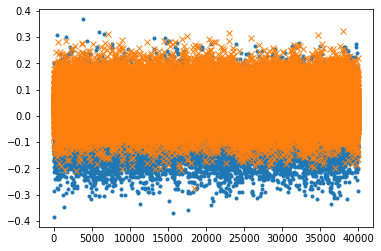

In [4]:
Fx = np.load(str(cname+str("_LR_2022_2Q_Yweight")+str("/")+str("_2Q_est")+str("/")+str("all_data")+str(".npz")),allow_pickle=True)
#print(Fx)
data_load=Fx['arr_0']

Fs = np.load(str(cname+str("_LR_2022_2Q_Yweight")+str("/")+str("tot_shots2")+str(".npz")),allow_pickle=True)
tot_shots=Fs['arr_0']

shots_actual=2304

shotsrun=4096
shotsper=np.round(512)



shotsEM=2000
shots_actual=2304
#
shotsrun=4096
shotsper=np.round(512)
p=0.5

chiX1 = 2.858721391887164;
chiX2 = -2.858718950651175;
chiX3 =  0;
chiX4 = 0;

chiY1 = -1.254216852498116;
chiY2 = -1.254220587644561;
chiY3 = 0;
chiY4 =  2.606344145490742;

estx_vec_512=[]
esty_vec_512=[]

mse_vec=[]
msex_vec=[]
msey_vec=[]

mse_vec_EM=[]
msex_vec_EM=[]
msey_vec_EM=[]

mse_vec_EM_512=[]
msex_vec_EM_512=[]
msey_vec_EM_512=[]

grouping=8

n00vec=[]
n01vec=[]
n10vec=[]
n11vec=[]
#50 repititions of the circuit
for hh in range(50):
    
    count00=0
    count01=0
    count10=0
    count11=0
    
    data_int=data_load[4*kk:4+4*kk]
    shots_int=tot_shots[4*kk:4+4*kk]
    
    for kk in range(4):
#         scaling_prob=shots_int[kk]/shotsrun
#         scaling_prob_vec.append(scaling_prob)

        n00=data_int[kk].get('00',0)
        n01=data_int[kk].get('01',0)
        n10=data_int[kk].get('10',0)
        n11=data_int[kk].get('11',0)
        
        #then make the vector
        
        data1=np.ones(shots_actual)
        data1[:int(n00)] = 0
        data1[int(n00):int(n00)+int(n01)] = 1
        data1[int(n00)+int(n01):int(n00)+int(n01)+int(n10)] = 2
        data1[int(n00)+int(n01)+int(n10):int(n00)+int(n01)+int(n10)+int(n11)] = 3
        np.random.shuffle(data1)
        #only want this much data
        dataint=data1[0:shots_int[kk]]
        
        count00=count00+np.count_nonzero(dataint==0)
        count01=count01+np.count_nonzero(dataint==1)
        count10=count10+np.count_nonzero(dataint==2)
        count11=count11+np.count_nonzero(dataint==3)
        
        countsint=np.count_nonzero(dataint==0)+np.count_nonzero(dataint==1)+np.count_nonzero(dataint==2)+np.count_nonzero(dataint==3)
        if countsint !=shots_int[kk]:
            print("\033[1;31;40m  Error, something not right with EM counts   ")
            
        if n00+n10+n01+n11 != shots_actual:
            print("\033[1;31;40m  Error, something not right with EM counts   ")

            
            
    totcounts=  count00+count01+count10+count11
    #now make a vector of all the data
    n00=count00
    n01=count01
    n10=count10
    n11=count11
    
    n00vec.append(n00)
    n01vec.append(n01)
    n10vec.append(n10)
    n11vec.append(n11)
    

    #THEN SUB GROUP with each of the 50 estimates
    if n00+n01+n10+n11 != shotsrun:
        print(n000+n010+n100+n110+n001+n011+n101+n111,shotsrun)
        print("\033[1;31;40m  Error, something not right with the counts from each estimate   ")
        
        
    for lll in range(100):
        shotsrunT=n00+n01+n10+n11

        data1=np.ones(shotsrunT)
        data1[:int(n00)] = 0
        data1[int(n00):int(n00)+int(n01)] = 1
        data1[int(n00)+int(n01):int(n00)+int(n01)+int(n10)] = 2
        data1[int(n00)+int(n01)+int(n10):int(n00)+int(n01)+int(n10)+int(n11)] = 3

        np.random.shuffle(data1)
        for hh in range(int(grouping)):
            dataint=data1[hh*shotsper:(hh+1)*shotsper]
            count00=np.count_nonzero(dataint==0)
            count01=np.count_nonzero(dataint==1)
            count10=np.count_nonzero(dataint==2)
            count11=np.count_nonzero(dataint==3)


            n1=count00
            n2=count01
            n3=count10
            n4=count11


            estx=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4)*(1/shotsper)
            esty=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4)*(1/shotsper)


            estx_vec_512.append(estx)
            esty_vec_512.append(esty)

            mse_vec_EM_512.append(estx**2+esty**2)
            msex_vec_EM_512.append((estx+intX)**2)
            msey_vec_EM_512.append((esty+intY)**2)

print(np.mean(mse_vec_EM_512))
print('mse in x = ',np.mean(msex_vec_EM_512))

print('mse in y = ',np.mean(msey_vec_EM_512))

plt.plot(estx_vec_512,'.')
plt.plot(esty_vec_512,'x')

print()
print('mean x value = ', np.mean(estx_vec_512) )

print('mean y value = ', np.mean(esty_vec_512) )


In [44]:
n00tot=np.sum(n00vec)
n01tot=np.sum(n01vec)
n10tot=np.sum(n10vec)
n11tot=np.sum(n11vec)
# print(n00tot+n01tot+n10tot+n11tot)
# print(4096*50)

totshots=n00tot+n01tot+n10tot+n11tot

p00=n00tot/totshots
p01=n01tot/totshots
p10=n10tot/totshots
p11=n11tot/totshots


MSEtot_x=[]
MSEtot_EM_x=[]
MSEtot_y=[]
MSEtot_EM_y=[]
nBootstrap=1000
for kk in range(nBootstrap):
    MSEint_x=[]
    MSE_EMint_x=[]
    MSEint_y=[]
    MSE_EMint_y=[]
    for jj in range(50*8):
        rv= np.random.multinomial(shotsper, [p00,p01,p10,p11], size=1)
        n1=rv[0][0]
        n2=rv[0][1]
        n3=rv[0][2]
        n4=rv[0][3]

        estx=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4)*(1/shotsper)
        esty=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4)*(1/shotsper)

        MSEint_x.append(estx**2)
        MSE_EMint_x.append((estx+intX)**2)
        MSEint_y.append(esty**2)
        MSE_EMint_y.append((esty+intY)**2)
        
    MSEtot_x.append(np.mean(MSEint_x))
    MSEtot_EM_x.append(np.mean(MSE_EMint_x))
    MSEtot_y.append(np.mean(MSEint_y))
    MSEtot_EM_y.append(np.mean(MSE_EMint_y))
    
print('MSE in x = ',np.mean(MSEtot_x),'+/-',np.std(MSEtot_x))
print('MSE in x with EM = ',np.mean(MSEtot_EM_x),'+/-',np.std(MSEtot_EM_x))
        
print('MSE in y = ',np.mean(MSEtot_y),'+/-',np.std(MSEtot_y))
print('MSE in y with EM = ',np.mean(MSEtot_EM_y),'+/-',np.std(MSEtot_EM_y))
    

MSE in x =  0.009032821216217044 +/- 0.0006216999162038335
MSE in x with EM =  0.008600549887279844 +/- 0.0005950040735867039
MSE in y =  0.007036485922804163 +/- 0.0005173122358166081
MSE in y with EM =  0.005730306223675925 +/- 0.0004319263666333573
